# Modelos de clasificación en modelos de aprendizaje supervisado    

A continuación, vamos a entrenar varias modelos de aprendizaje supervisado de clasificacion , tales como: 
*   Regresión logística. 
*   Naiven Bayes
*   Árboles de clasificación. 
*   Random Forest
*   Máquinas de soporte vectorial.
*   Redes neuronales 
posteriormente, seleccionaremos el mejor modelo según. 

In [1]:
import sys
import warnings

warnings.filterwarnings('ignore')




## Preprocesamiento  

Cargamos la base de datos. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler,OneHotEncoder



df=pd.read_csv('../Datos/obesity.csv')
df


,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Dividimos el conjunto de datos en un 80% para entrenar a los modelos y el restante para el testeo de los mismos.

In [3]:
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
objetivo_encoder = OrdinalEncoder(categories=[categories])
y=objetivo_encoder.fit(df[['NObeyesdad']])
Y=y.transform(df[['NObeyesdad']])
X=df.drop(['NObeyesdad'],axis=1)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1295,1295,Female,38.148845,1.557808,79.661693,yes,yes,2.000000,3.000000,Sometimes,no,1.274774,no,0.000000,0.000000,Sometimes,Automobile
1627,1627,Male,40.366238,1.722396,109.349025,yes,yes,2.281963,3.770379,Sometimes,no,1.000000,no,1.330519,0.000000,no,Automobile
1388,1388,Female,39.648946,1.572791,80.086524,yes,yes,2.071622,2.977909,Sometimes,no,1.468297,no,0.000000,0.000000,no,Automobile
1318,1318,Male,23.237302,1.761008,97.829344,yes,yes,2.000000,3.000000,Sometimes,no,2.988771,no,2.429923,1.978043,no,Public_Transportation
648,648,Female,22.547298,1.722461,51.881263,yes,yes,2.663421,3.000000,Frequently,no,1.041110,no,0.794402,1.391948,no,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1033,Male,19.671876,1.699474,78.000000,yes,no,1.925064,2.358298,Sometimes,no,2.774043,no,0.000000,0.133566,no,Public_Transportation
1731,1731,Male,30.554956,1.779136,120.600940,yes,yes,2.671238,3.000000,Sometimes,no,2.145368,no,0.882709,0.593917,Sometimes,Automobile
763,763,Male,21.000000,1.620000,70.000000,no,yes,2.000000,1.000000,no,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
835,835,Female,29.320380,1.642506,69.906708,yes,yes,2.366949,3.000000,Sometimes,no,1.926577,no,1.581242,0.000000,Sometimes,Automobile


In [4]:

        
variables_nominales = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
variables_ordinales = [ 'NCP', 'CH2O', 'FAF', 'TUE' ]
variables_ordinales2 = ['CAEC']
variables_ordinales3 = ['CALC']

variables_numericas = ['Age']
#objetivo = ['NObeyesdad']
categorical_encoder = OneHotEncoder(handle_unknown='ignore')

categories2=[['no', 'Sometimes', 'Frequently', 'Always']]
categorical_encoder = OneHotEncoder(handle_unknown='ignore')

numerical_pipe = MinMaxScaler()

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)


ordinal_encoder2 = OrdinalEncoder(categories=categories2,handle_unknown='use_encoded_value', unknown_value=-1)

preprocessing = ColumnTransformer(
    [
        ("Codificación de Categóricas", categorical_encoder, variables_nominales),
        ("Transformación de numéricas", numerical_pipe, variables_numericas),
        ("Codificación de ordinales",ordinal_encoder,variables_ordinales),
 #       ("Codificación de objetivo",objetivo_encoder,objetivo),
       ("Codificación de ordinales2",ordinal_encoder2,variables_ordinales2),
       ("Codificación de ordinales3",ordinal_encoder2,variables_ordinales3),
    ],
    verbose_feature_names_out=False,
)



flujo_preposesamiento= Pipeline(
    [
        ("Preprocesamiento", preprocessing)
         
    ]
)
flujo_preposesamiento.fit(X_train,Y_train)


Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                                 ('Codificación de ordinales2',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['CAEC']),
                                                 ('Codificación de ordinales3',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['CALC'])],
                                   verbose_feature_names_out=False))])

## Regresión Logística  

Para la regresión logística, haciendo un tuning de parámetros, encontramos que el mejor modelo, con respecto al accuracy de entrenamiento (0.522511), es el que tiene como parámetros {'C': 2.78256, 'max_iter': 300, 'penalty': 'l2'} 

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


parametros = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 10),
    "max_iter": [1000, 2000, 3000],
}
RL = GridSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_grid=parametros,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)

flujo_logistica= Pipeline(
    [
        ("Preprocesamiento", preprocessing),
        ("Modelo",RL),
         
    ]
)
flujo_logistica

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                   verbose_feature_names_out=False)),
                ('Modelo',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0),
                              n_jobs=-1,
                              param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                          'max_iter': [1000, 2000, 3000],
                                          'penalty': ['l1', 'l2']},
                              scoring='accuracy'))])

In [6]:
flujo_logistica.fit(X_train,Y_train.ravel())

/Users/williamcamilolopezvega/anaconda3/envs/ProyectoObesidad/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/williamcamilolopezvega/anaconda3/envs/ProyectoObesidad/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opti

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                   verbose_feature_names_out=False)),
                ('Modelo',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0),
                              n_jobs=-1,
                              param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                          'max_iter': [1000, 2000, 3000],
                                          'penalty': ['l1', 'l2']},
                              scoring='accuracy'))])

In [7]:
from tabulate import tabulate

modelo_RL=flujo_logistica["Modelo"]

tabla = [
    ["C", modelo_RL.best_params_["C"] ],
    ["Max_iter",modelo_RL.best_params_["max_iter"]],
    ["penalty",modelo_RL.best_params_["penalty"]],
    ["Accuracy entrenamiento",flujo_logistica.score(X_train,Y_train)],
    ["Accuracy test",flujo_logistica.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤═════════════════════╕
│ C                      │ 10000.0             │
├────────────────────────┼─────────────────────┤
│ Max_iter               │ 3000                │
├────────────────────────┼─────────────────────┤
│ penalty                │ l2                  │
├────────────────────────┼─────────────────────┤
│ Accuracy entrenamiento │ 0.5562796208530806  │
├────────────────────────┼─────────────────────┤
│ Accuracy test          │ 0.49645390070921985 │
╘════════════════════════╧═════════════════════╛


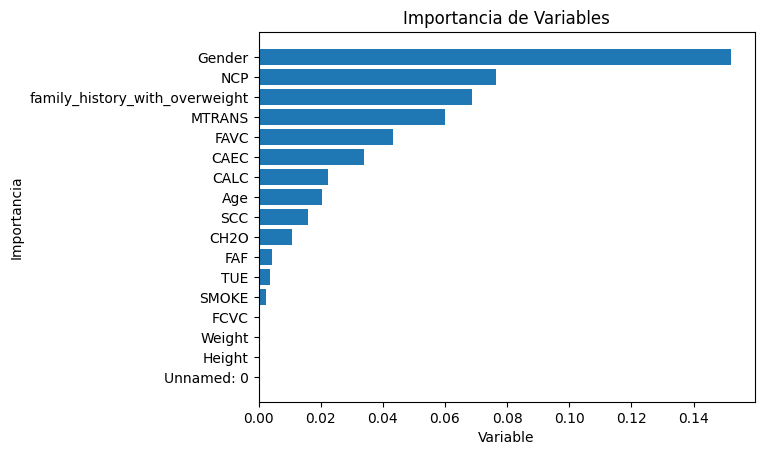

In [8]:
results = permutation_importance(
    flujo_logistica, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

## Naive Bayes

In [9]:

from sklearn.naive_bayes import GaussianNB
parametros = {'var_smoothing': np.linspace(0.001, 1, 10)}  


NB = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=parametros,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)

flujo_NB= Pipeline(
    [
        ("Preprocesamiento", preprocessing),
        ("Modelo",NB),
         
    ]
)
flujo_NB

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                                 ('Codificación de ordinales3',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['CALC'])],
                                   verbose_feature_names_out=False)),
                ('Modelo',
                 GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                              param_grid={'var_smoothing': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])},
                              scoring='accuracy'))])

In [10]:
flujo_NB.fit(X_train,Y_train.ravel())

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                                 ('Codificación de ordinales3',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['CALC'])],
                                   verbose_feature_names_out=False)),
                ('Modelo',
                 GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                              param_grid={'var_smoothing': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])},
                              scoring='accuracy'))])

In [11]:
modelo_NB=flujo_NB["Modelo"]

tabla = [
    ["var_smoothing", modelo_NB.best_params_["var_smoothing"] ],


    ["Accuracy entrenamiento",flujo_NB.score(X_train,Y_train)],
    ["Accuracy test",flujo_NB.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤══════════╕
│ var_smoothing          │ 0.112    │
├────────────────────────┼──────────┤
│ Accuracy entrenamiento │ 0.329976 │
├────────────────────────┼──────────┤
│ Accuracy test          │ 0.174941 │
╘════════════════════════╧══════════╛


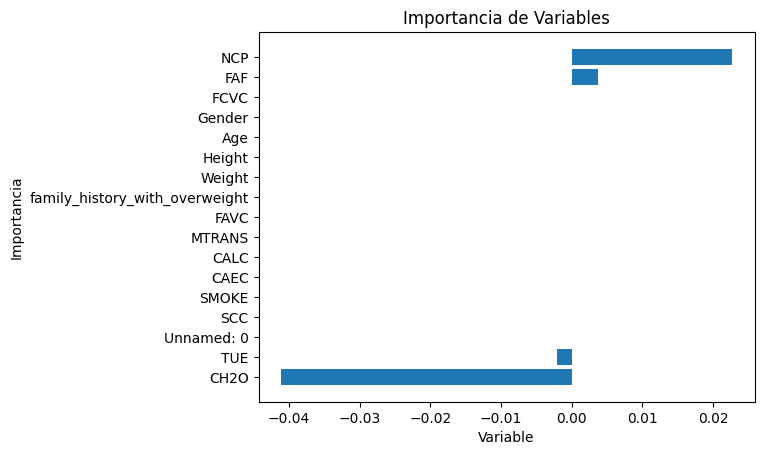

In [12]:
results = permutation_importance(
    flujo_NB, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

# Arboles de decisión      

In [13]:


from sklearn.tree import DecisionTreeClassifier


parametros =  {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    "min_samples_split": [2, 5, 10,20,50],
    "min_samples_leaf": [1, 2, 5,10,20],

} 


AC = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=parametros,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)

flujo_AC= Pipeline(
    [
        ("Preprocesamiento", preprocessing),
        ("Modelo",AC),
         
    ]
)

flujo_AC.fit(X_train,Y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                                                 unknown_value=-1),
                                                  ['CALC'])],
                                   verbose_feature_names_out=False)),
                ('Modelo',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=0),
                              n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23],
                                          'min_samples_leaf': [1, 2, 5, 10, 20],
                                          'min_samples_split': [2, 5, 10, 20,
                                                                50]},
                              scoring='accuracy'))])

In [14]:
modelo_AC=flujo_AC["Modelo"]

tabla = [
    ["criterion", modelo_AC.best_params_["criterion"] ],
    ["max_depth", modelo_AC.best_params_["max_depth"] ],
    ["min_samples_split", modelo_AC.best_params_["min_samples_split"] ],
    ["min_samples_leaf", modelo_AC.best_params_["min_samples_leaf"] ],

    ["Accuracy entrenamiento",flujo_AC.score(X_train,Y_train)],
    ["Accuracy test",flujo_AC.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤═════════════════════╕
│ criterion              │ entropy             │
├────────────────────────┼─────────────────────┤
│ max_depth              │ 15                  │
├────────────────────────┼─────────────────────┤
│ min_samples_split      │ 2                   │
├────────────────────────┼─────────────────────┤
│ min_samples_leaf       │ 1                   │
├────────────────────────┼─────────────────────┤
│ Accuracy entrenamiento │ 0.9982227488151659  │
├────────────────────────┼─────────────────────┤
│ Accuracy test          │ 0.40189125295508277 │
╘════════════════════════╧═════════════════════╛


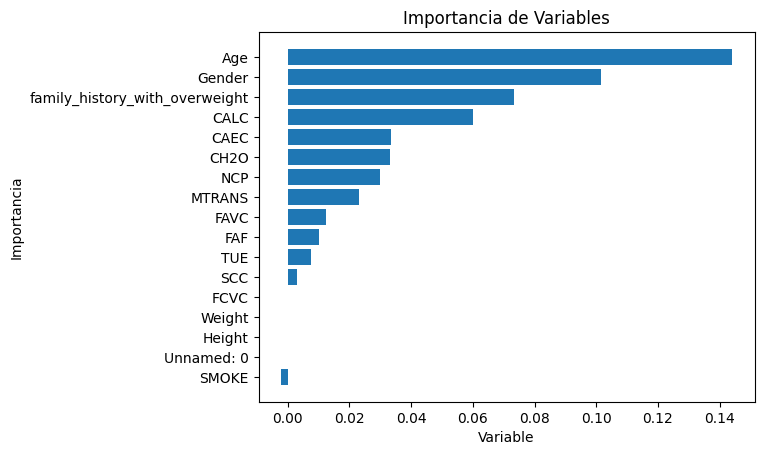

In [15]:
results = permutation_importance(
    flujo_AC, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

## Random Forest

In [16]:
%%capture
from sklearn.ensemble import RandomForestClassifier


parametros =  {
    'criterion':['gini', 'entropy'],
    "n_estimators": [100, 200, 300],  # Número de árboles
    "max_depth": [2, 4, 6,8,10],          # Profundidad máxima de los árboles
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],    # Mínimo de muestras en una hoja final
}


RF= GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=parametros,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)

flujo_RF= Pipeline(
    [
        ("Preprocesamiento", preprocessing),
        ("Modelo",RF),
         
    ]
)

flujo_RF.fit(X_train,Y_train.ravel())

In [ ]:
modelo_RF=flujo_RF["Modelo"]

tabla = [
    ["criterion", modelo_RF.best_params_["criterion"] ],
    ["max_depth", modelo_RF.best_params_["max_depth"] ],
    ["min_samples_split", modelo_RF.best_params_["min_samples_split"] ],
    ["min_samples_leaf", modelo_RF.best_params_["min_samples_leaf"] ],

    ["Accuracy entrenamiento",flujo_RF.score(X_train,Y_train)],
    ["Accuracy test",flujo_RF.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤════════════════════╕
│ criterion              │ entropy            │
├────────────────────────┼────────────────────┤
│ max_depth              │ 10                 │
├────────────────────────┼────────────────────┤
│ min_samples_split      │ 5                  │
├────────────────────────┼────────────────────┤
│ min_samples_leaf       │ 1                  │
├────────────────────────┼────────────────────┤
│ Accuracy entrenamiento │ 0.943127962085308  │
├────────────────────────┼────────────────────┤
│ Accuracy test          │ 0.7044917257683215 │
╘════════════════════════╧════════════════════╛


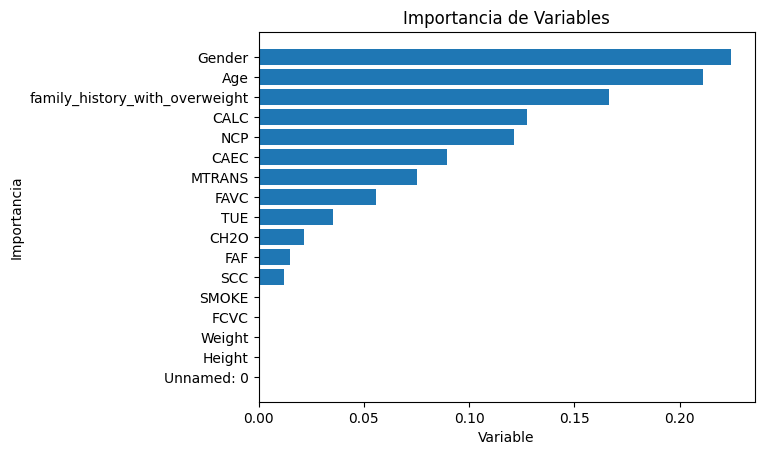

In [ ]:
results = permutation_importance(
    flujo_RF, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

## Maquina de soporte vectorial 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

parametros =  {
    "kernel": ["linear"],
    "C": [0.1, 1],
    "gamma": [0.001, 0.01],
}


MSV = RandomizedSearchCV(estimator=SVC(random_state=0), 
                         param_distributions=parametros, 
                         n_iter=100, cv=5)

flujo_MSV= Pipeline(
    [
        ("Preprocesamiento", preprocessing),
        ("Modelo",MSV),
         
    ]
)

